# Abalone case study Projects

In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Abalone.csv')

In [7]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [14]:
df.shape

(4177, 9)

In [15]:
df.size

37593

In [18]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


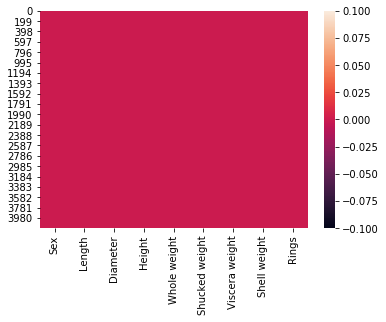

In [19]:
sns.heatmap(df.isnull())

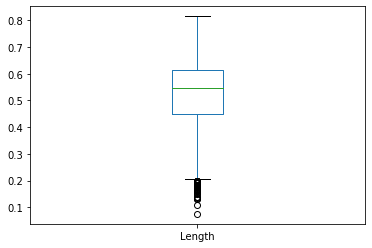

In [20]:
df['Length'].plot.box()

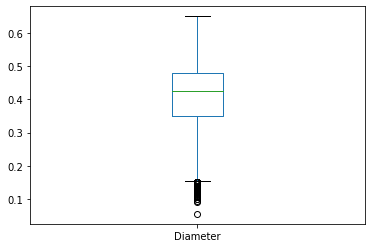

In [21]:
df['Diameter'].plot.box()

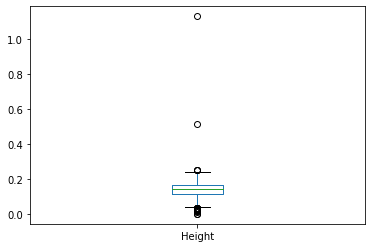

In [22]:
df['Height'].plot.box()

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

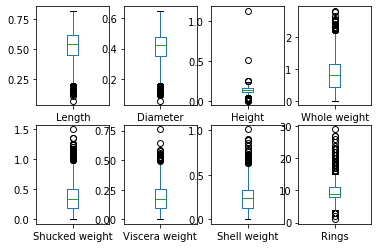

In [23]:
df.plot(kind='box',subplots=True,layout=(2,4))

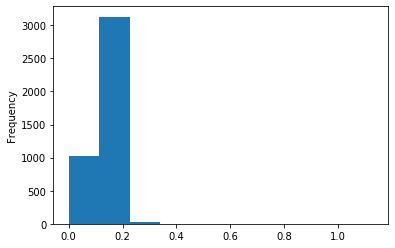

In [28]:
df['Height'].plot.hist()

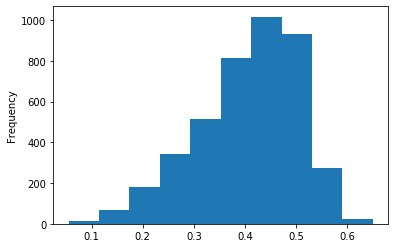

In [25]:
df['Diameter'].plot.hist()

In [26]:
# Log Tranformation
from scipy.stats import boxcox
df['Length']=boxcox(df['Length'],0)

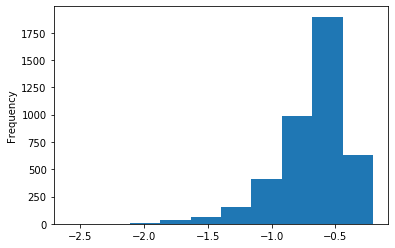

In [30]:
df['Length'].plot.hist()

In [34]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

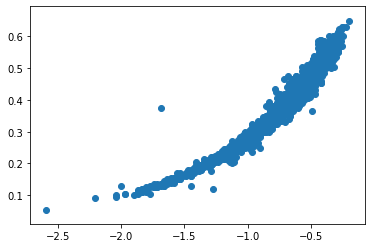

In [37]:
plt.scatter(df['Length'],df['Diameter'])
plt.show()

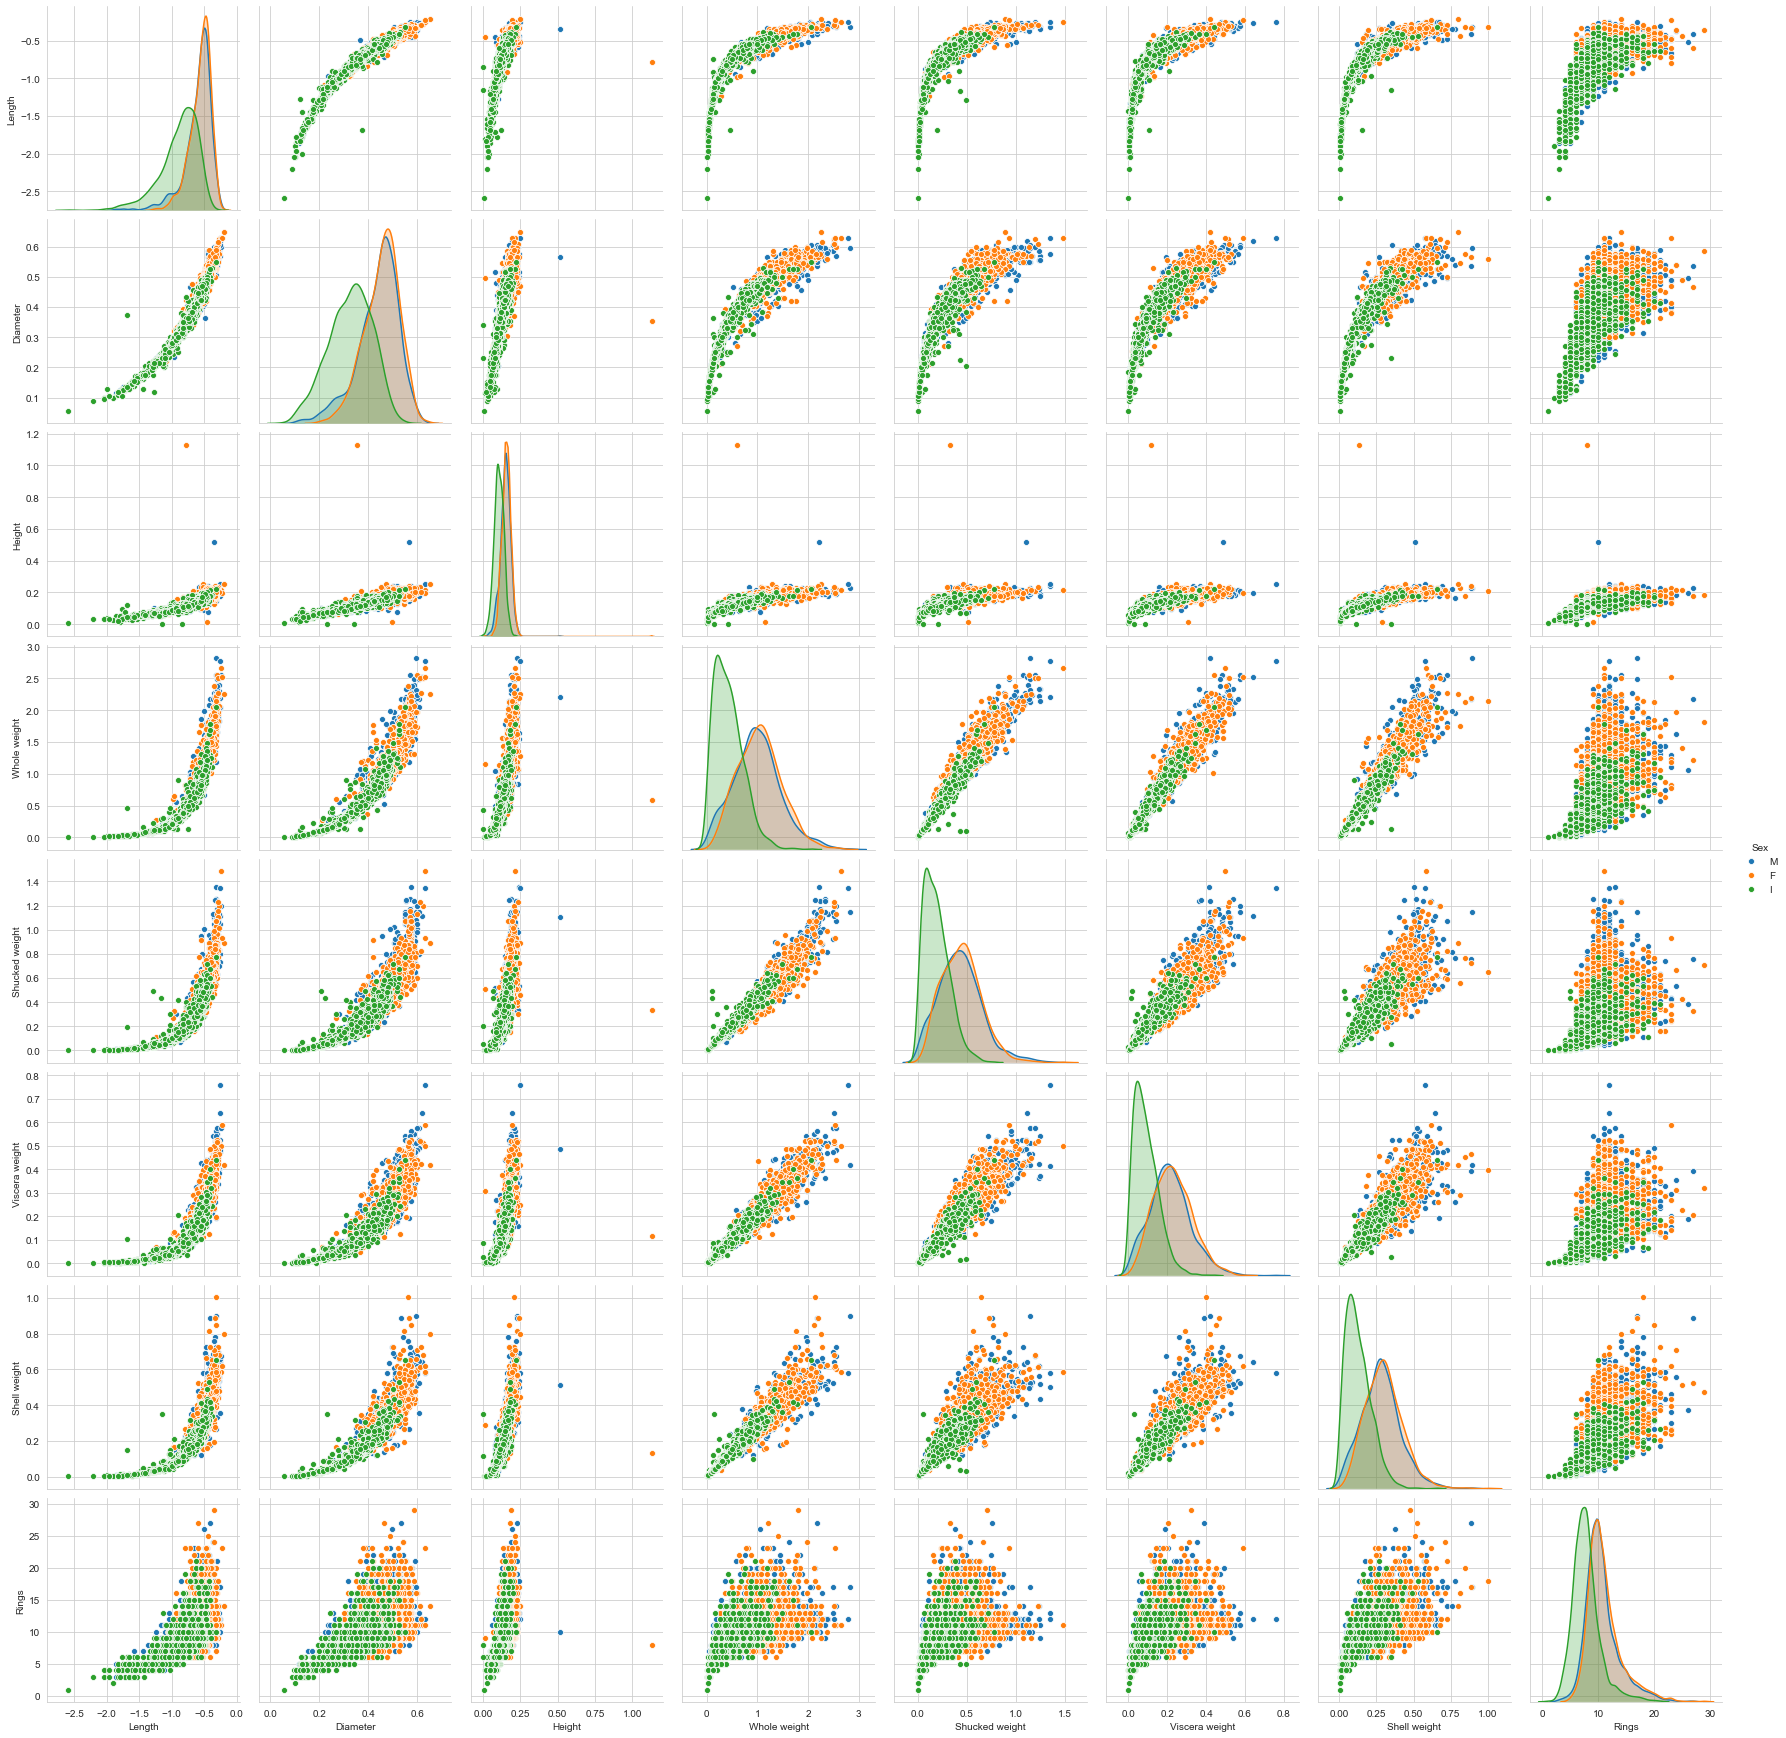

In [38]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Sex',size=3);
plt.show()

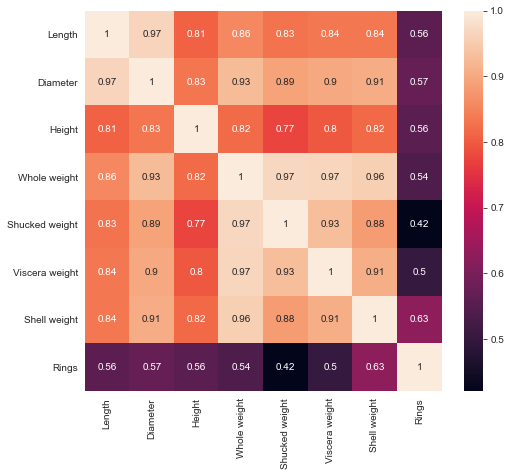

In [39]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

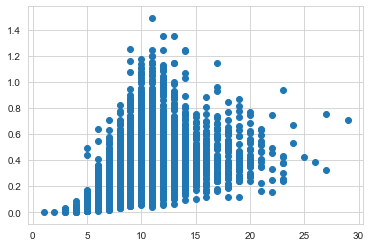

In [40]:
plt.scatter(df['Rings'],df['Shucked weight'])
plt.show()

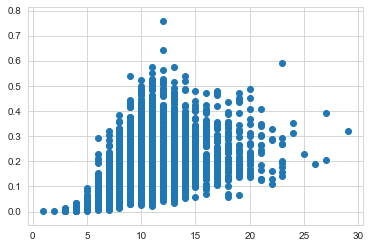

In [42]:
plt.scatter(df['Rings'],df['Viscera weight'])
plt.show()


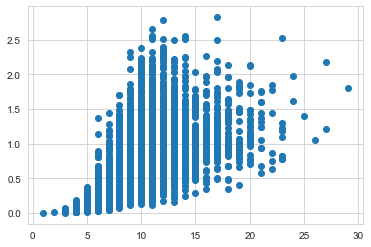

In [43]:
plt.scatter(df['Rings'],df['Whole weight'])
plt.show()

In [44]:
# drop the SEX
df.drop('Sex',axis=1,inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.787458,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,-1.049822,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-0.634878,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,-0.820981,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,-1.108663,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [45]:
#classification
x=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]
y=df['Rings']

In [46]:
#Test be 30% of the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [48]:
x_train.shape

(2923, 7)

In [49]:
y_train.shape

(2923,)

In [50]:
x_test.shape

(1254, 7)

In [51]:
y_test.shape

(1254,)

In [52]:
# Breakdown of Distribution of Classes
print('Class value of Count')
print(y_test.value_counts())
print('Class range of proportions')
print(y_test.value_counts()/len(y_test))

Class value of Count
9     216
10    178
8     169
11    134
7     109
12     94
6      72
13     70
14     48
5      37
15     27
16     24
17     17
18     13
19     12
4      10
20      7
21      5
23      5
27      2
22      2
3       2
26      1
Name: Rings, dtype: int64
Class range of proportions
9     0.172249
10    0.141946
8     0.134769
11    0.106858
7     0.086922
12    0.074960
6     0.057416
13    0.055821
14    0.038278
5     0.029506
15    0.021531
16    0.019139
17    0.013557
18    0.010367
19    0.009569
4     0.007974
20    0.005582
21    0.003987
23    0.003987
27    0.001595
22    0.001595
3     0.001595
26    0.000797
Name: Rings, dtype: float64


In [54]:
lm = LinearRegression()

In [55]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.coef_

array([  2.96048133,   4.19650661,   7.78920931,   9.82849315,
       -21.51937685,  -9.43070456,   8.676458  ])

In [57]:
lm.intercept_

8.317740106707173

In [59]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [60]:
lm.score(x_train,y_train)

0.5277127633815435

In [62]:
#Predicted Value
pred=lm.predict(x_test)
print("Predicted  age:",pred)
print("actual age",y_test)

Predicted  age: [15.35364652  8.70787061  7.99702762 ...  4.51072326  8.79315587
  8.7942119 ]
actual age 341     14
3413     9
1088     6
98       7
3661    10
        ..
473     11
3395    13
43       5
702      9
3772     9
Name: Rings, Length: 1254, dtype: int64


In [63]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))

error:
Mean absolute error: 1.6219596054222267


In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5292846612900527


In [65]:
#predict the age by providing the values
t = np.array([6.5,8.0,64.6,34.5,71.8,22.4,36.7])

In [66]:
t.shape

(7,)

In [67]:
t=t.reshape(1,-1)
t.shape

(1, 7)

In [68]:
lm.predict(t)

array([-534.51417408])

In [69]:
# To save the model
joblib.dump(t, 'Abalone.pkl')

['Abalone.pkl']